## This jupyter notebook plots a specific trajectory (specified by id) of an vehicle with corresponding positions of the surrounding vehicles on semantic segmentation

In [2]:
import os
import json
import numpy as np
import cv2
import pandas as pd
from matplotlib import pyplot as plt
import math

## Example of Plotting Trojectory represented by the Center of Obejcts 

In [3]:
# Input Parameters
anno_path = "./Example_tracked_all.txt" # Annotation file path
tid = 10  # Vehicle ID
frame_rate = 25 # fps 
sample_rate = 0.4 # sample rate in seconds


# Define color and circle size of classes 
cls_size_color = {
    0: (20,(0, 255, 255)), # yellow car
    1: (25,(255,255, 0)), # Cyan truck
    2: (30,(0, 255, 0)), # red bus
    3: (20,(0,255,165)), # orange van rgb brg
    4: (10,(128,128,128)), # grey cyclist
    5: (10,(255, 255, 255)) # white pedestrain
}


# The circle size, color, line thickness of target
t_size = 20
t_thickness = 10
t_color = (0, 0, 0)


# Load and sample the annotation
df = pd.read_csv(anno_path, header=None, sep=" ", dtype=int)
df.columns = ["frame",'cls_no', "id", 'xc', 'yc', 'w', 'h', 'infer']
frames = list(pd.unique(df.loc[df['id'] == tid, 'frame']))
frames.sort()
sample_interval = int(math.floor(sample_rate * 25))
sample_frames = [frames[i] for i in range(0, len(frames),sample_interval)]

# extract x ,y coordinates
target = []
other = []

for f_no in sample_frames:
    df_f = df[df['frame'] == f_no]
    other_objects = []
    for index, row in df_f.iterrows():
        if row['id'] == tid:
            target.append((row['xc'], row['yc']))
        else:
            other_objects.append((row['cls_no'], row['xc'], row['yc']))
    other.append(other_objects)

target_trjs = [target[: i + 1] for i in range(len(target))]


# Load segmentation image
base_img = cv2.imread("./segmentation_output/Morges_Avenue_de_la_Gotta_2_color.jpg")

# Plot images
for idx, e in enumerate(zip(target_trjs,other)):
    trjs, objs = e
    new_img = base_img.copy()
    if idx == 0:
        cv2.circle(new_img, trjs[0], t_size, t_color, -1)
    else:
        for i in range(len(trjs )- 1):
            cv2.line(new_img, trjs[i], trjs[i + 1], t_color, thickness=t_thickness)
            cv2.circle(new_img, trjs[i], t_size, t_color, -1)
            cv2.circle(new_img, trjs[i+1], t_size, t_color, -1)
    for obj in objs:
        size, color = cls_size_color[obj[0]]
        cv2.circle(new_img, (obj[1], obj[2]), size, color, -1)
    
    print("Save image to {}".format("trajectory_output/example_{}.jpg".format(idx)))
    cv2.imwrite("trajectory_output/example_{}.jpg".format(idx), new_img)

Save image to trajectory_output/example_0.jpg
Save image to trajectory_output/example_1.jpg
Save image to trajectory_output/example_2.jpg
Save image to trajectory_output/example_3.jpg
Save image to trajectory_output/example_4.jpg
Save image to trajectory_output/example_5.jpg
Save image to trajectory_output/example_6.jpg
Save image to trajectory_output/example_7.jpg
Save image to trajectory_output/example_8.jpg
Save image to trajectory_output/example_9.jpg
Save image to trajectory_output/example_10.jpg
Save image to trajectory_output/example_11.jpg
Save image to trajectory_output/example_12.jpg
Save image to trajectory_output/example_13.jpg
Save image to trajectory_output/example_14.jpg
Save image to trajectory_output/example_15.jpg
Save image to trajectory_output/example_16.jpg
Save image to trajectory_output/example_17.jpg
Save image to trajectory_output/example_18.jpg
Save image to trajectory_output/example_19.jpg
Save image to trajectory_output/example_20.jpg
Save image to trajector

### Show the first image of the output

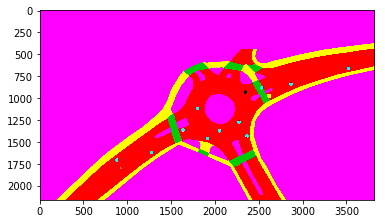

In [11]:
img = cv2.imread("trajectory_output/example_0.jpg")
plt.imshow(img)

## Example of Plotting Trojectory represented by the Center of Obejcts 

True

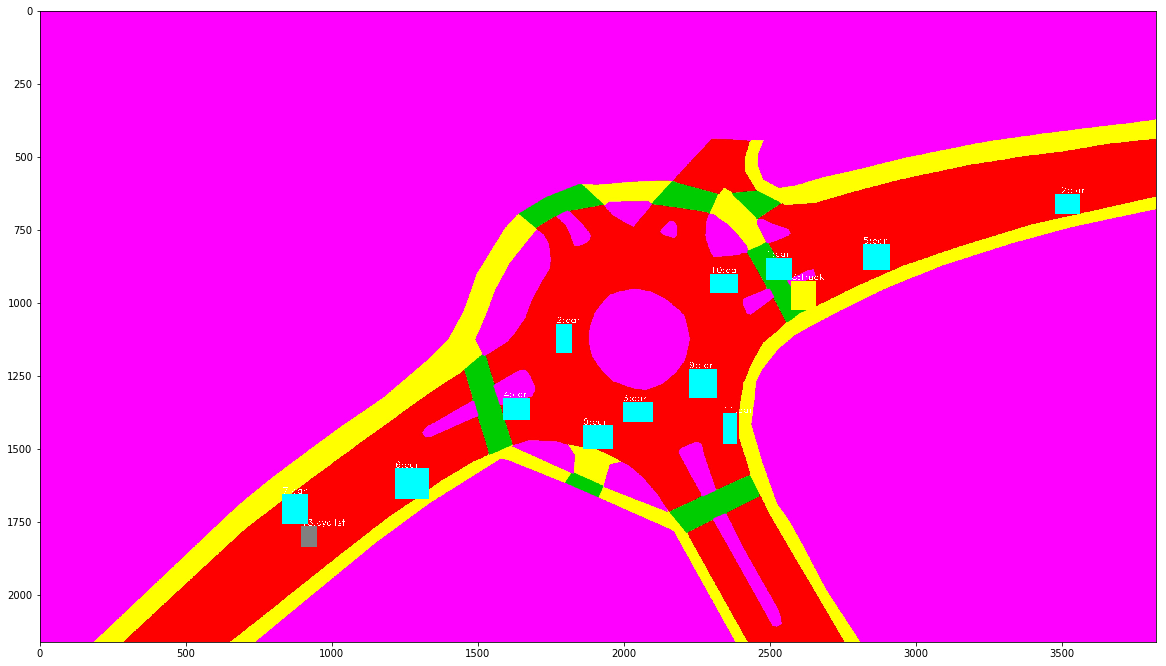

In [19]:
# Input Parameters
anno_path = "./Example_tracked_all.txt" # Annotation file path
tid = 10  # Vehicle ID
frame_rate = 25 # fps 
sample_rate = 0.4 # sample rate in seconds
text_color = (255,255,255)

# Load and sample the annotation
anno_path = "./Example_tracked_all.txt" # Annotation file path
df = pd.read_csv(anno_path, header=None, sep=" ", dtype=int)
df.columns = ["frame",'cls_no', "id", 'xc', 'yc', 'w', 'h', 'infer']
frames = list(pd.unique(df.loc[df['id'] == tid, 'frame']))
frames.sort()
sample_interval = int(math.floor(sample_rate * 25))
sample_frames = [frames[i] for i in range(0, len(frames),sample_interval)]

# Load segmentation image
base_img = cv2.imread("./segmentation_output/Morges_Avenue_de_la_Gotta_2_color.jpg")

cls_names = {
    0: 'car',
    1: 'truck',
    2: 'bus',
    3: 'van',
    4: 'cyclist',
    5: 'pedestrian'
}

# Plot bounding boxes of the first frame of sample_frames on segmentation
f_no = sample_frames[0]
df_f = df[df['frame'] == f_no]

new_img = base_img.copy() 
for index, row in df_f.iterrows():
    # Plot bouning box
    p_1 = (row['xc'] - int(row['w'] / 2), row['yc'] - int(row['h'] / 2))
    p_2 = (row['xc'] + int(row['w'] / 2), row['yc'] + int(row['h'] / 2))
    cv2.rectangle(new_img, p_1, p_2, cls_size_color[row['cls_no']][1], cv2.FILLED)
    # Plot class name an id
    y_offset = 3
    text = "{}:{}".format(str(row['id']), cls_names[row['cls_no']])
    p_t = (p_1[0], p_1[1] - y_offset)
    cv2.putText(new_img, text, p_t, cv2.FONT_HERSHEY_DUPLEX,1,text_color, 1)
    
plt.figure(figsize=(20,15))
plt.imshow(new_img)
cv2.imwrite("./test.jpg", new_img)